In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, ShuffleSplit
from yellowbrick.model_selection import LearningCurve

In [ ]:
# https://drive.google.com/file/d/1P4ILFVOrmmYH6BibikRytI1cbWa_RKas/view?usp=sharing
!gdown --id 1P4ILFVOrmmYH6BibikRytI1cbWa_RKas

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1P4ILFVOrmmYH6BibikRytI1cbWa_RKas
To: /content/weatherAUS_cleaned_3.1.csv
100% 22.5M/22.5M [00:00<00:00, 166MB/s]


In [ ]:
df = pd.read_csv("/content/weatherAUS_cleaned_3.1.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131941 entries, 0 to 131940
Data columns (total 29 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Date             131941 non-null  object 
 1   Location         131941 non-null  object 
 2   MinTemp          131941 non-null  float64
 3   MaxTemp          131941 non-null  float64
 4   Rainfall         131941 non-null  float64
 5   Sunshine         131941 non-null  float64
 6   WindGustDir      131941 non-null  object 
 7   WindGustSpeed    131941 non-null  float64
 8   WindDir9am       131941 non-null  object 
 9   WindDir3pm       131941 non-null  object 
 10  WindSpeed9am     131941 non-null  float64
 11  WindSpeed3pm     131941 non-null  float64
 12  Humidity9am      131941 non-null  float64
 13  Humidity3pm      131941 non-null  float64
 14  Pressure9am      131941 non-null  float64
 15  Pressure3pm      131941 non-null  float64
 16  Temp9am          131941 non-null  floa

# **Phân tích biến thời gian**

##**Phân tích thời gian theo biến Rainfall**

In [ ]:
time_anal1 = df[['Rainfall', 'Year', 'Month']]
time_anal1 = time_anal1.loc[(time_anal1['Rainfall'] != 0) & (time_anal1['Year'] != 2007)]

### Phân tích theo tháng

In [ ]:
month1 = time_anal1[['Month','Rainfall']]
grmonth = month1.groupby(['Month']).mean()
grmonth.reset_index(inplace = True)
print('Lượng mưa trung bình theo tháng')
print(grmonth)

Lượng mưa trung bình theo tháng
    Month  Rainfall
0       1  4.667689
1       2  4.711081
2       3  4.496768
3       4  4.045715
4       5  3.770469
5       6  3.988596
6       7  3.847324
7       8  3.985318
8       9  3.804748
9      10  3.692228
10     11  4.547718
11     12  4.500096


In [ ]:
sortedup_grmonth = grmonth.sort_values(by = 'Rainfall',  ascending=False)
sorteddown_grmonth = grmonth.sort_values(by = 'Rainfall',  ascending=True)
print('5 tháng có lượng mưa trung bình nhiều nhất: ')
print(sortedup_grmonth.head())

print('5 tháng có lượng mưa trung bình ít nhất: ')
print(sorteddown_grmonth.head())


5 tháng có lượng mưa trung bình nhiều nhất: 
    Month  Rainfall
1       2  4.711081
0       1  4.667689
10     11  4.547718
11     12  4.500096
2       3  4.496768
5 tháng có lượng mưa trung bình ít nhất: 
   Month  Rainfall
9     10  3.692228
4      5  3.770469
8      9  3.804748
6      7  3.847324
7      8  3.985318


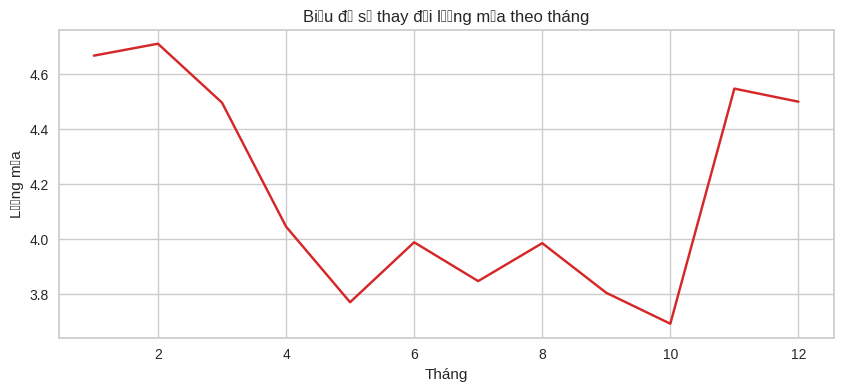

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(grmonth['Month'], grmonth['Rainfall'] , color='tab:red')
plt.gca().set(title= 'Biểu đồ sự thay đổi lượng mưa theo tháng', xlabel='Tháng', ylabel='Lượng mưa')
plt.show()

###Phân tích theo năm

In [ ]:
year1 = time_anal1[['Rainfall', 'Year']]
gryear = year1.groupby(['Year']).mean()
gryear.reset_index(inplace = True)
print('Lượng mưa trung bình theo năm')
print(gryear)

Lượng mưa trung bình theo năm
   Year  Rainfall
0  2008  4.510447
1  2009  4.002280
2  2010  4.435331
3  2011  4.238328
4  2012  4.090372
5  2013  4.164523
6  2014  3.942918
7  2015  3.874421
8  2016  4.202542
9  2017  4.181672


In [ ]:
sortedup_gryear = gryear.sort_values(by = 'Rainfall',  ascending=False)
sorteddown_gryear = gryear.sort_values(by = 'Rainfall',  ascending=True)
print('5 năm có lượng mưa trung bình nhiều nhất: ')
print(sortedup_gryear.head())

print('5 năm có lượng mưa trung bình ít nhất: ')
print(sorteddown_gryear.head())

5 năm có lượng mưa trung bình nhiều nhất: 
   Year  Rainfall
0  2008  4.510447
2  2010  4.435331
3  2011  4.238328
8  2016  4.202542
9  2017  4.181672
5 năm có lượng mưa trung bình ít nhất: 
   Year  Rainfall
7  2015  3.874421
6  2014  3.942918
1  2009  4.002280
4  2012  4.090372
5  2013  4.164523


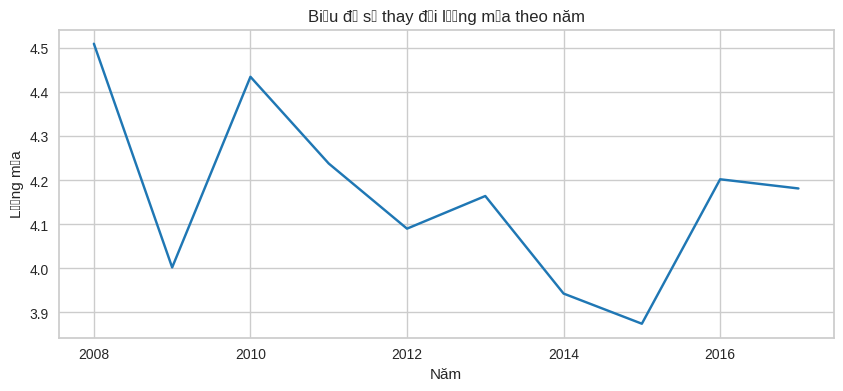

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(gryear['Year'], gryear['Rainfall'] , color='tab:blue')
plt.gca().set(title= 'Biểu đồ sự thay đổi lượng mưa theo năm', xlabel='Năm', ylabel='Lượng mưa')
plt.show()

##**Phân tích thời gian theo biến nhiệt độ**

###Phân tích theo tháng

In [ ]:
time_anal_temp= df[['MaxTemp', 'MinTemp', 'Year', 'Month']]
time_anal_temp = time_anal_temp.loc[time_anal_temp['Year'] != 2007]

In [ ]:
month2 = time_anal_temp[['Month','MaxTemp']]

grmonth2 = month2.groupby(['Month']).mean()
grmonth2.reset_index(inplace = True)
print('Nhiệt độ lớn nhất trung bình theo tháng')
print(grmonth2)

Nhiệt độ lớn nhất trung bình theo tháng
    Month    MaxTemp
0       1  29.452854
1       2  28.885713
2       3  26.999217
3       4  23.758031
4       5  20.190760
5       6  17.564159
6       7  17.069983
7       8  18.551490
8       9  20.919057
9      10  23.567506
10     11  26.101425
11     12  27.526425


In [ ]:
sortedup_grmonth2 = grmonth2.sort_values(by = 'MaxTemp',  ascending=False)
print('5 tháng có nhiệt độ trung bình cao nhất: ')
print(sortedup_grmonth2.head())

5 tháng có nhiệt độ trung bình cao nhất: 
    Month    MaxTemp
0       1  29.452854
1       2  28.885713
11     12  27.526425
2       3  26.999217
10     11  26.101425


In [ ]:
month3 = time_anal_temp[['Month','MinTemp']]

grmonth3 = month3.groupby(['Month']).mean()
grmonth3.reset_index(inplace = True)
print('Nhiệt độ nhỏ nhất trung bình theo tháng')
print(grmonth3)

Nhiệt độ nhỏ nhất trung bình theo tháng
    Month    MinTemp
0       1  17.238879
1       2  17.253505
2       3  15.740544
3       4  12.755316
4       5   9.551525
5       6   7.803377
6       7   6.997783
7       8   7.488450
8       9   9.379385
9      10  11.381856
10     11  14.107828
11     12  15.549443


In [ ]:
sorteddown_grmonth3 = grmonth3.sort_values(by = 'MinTemp',  ascending=True)
print('5 tháng có nhiệt độ trung bình thấp nhất: ')
print(sorteddown_grmonth3.head())

5 tháng có nhiệt độ trung bình thấp nhất: 
   Month   MinTemp
6      7  6.997783
7      8  7.488450
5      6  7.803377
8      9  9.379385
4      5  9.551525


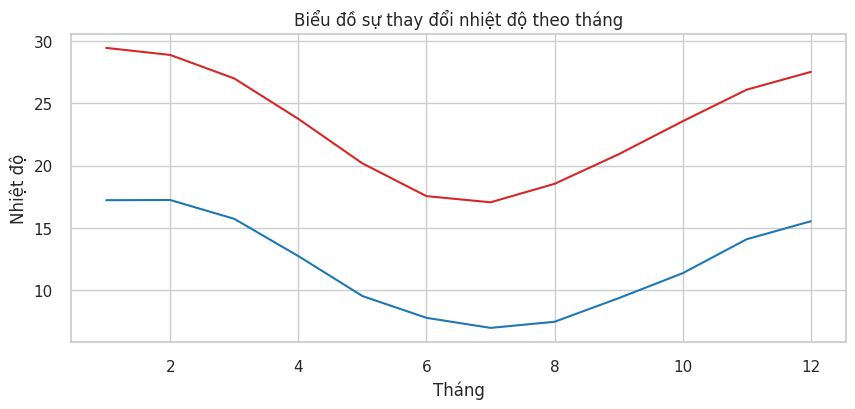

In [ ]:
plt.figure(figsize=(10,4))
sns.set(style="whitegrid")
plt.plot(grmonth2['Month'], grmonth2['MaxTemp'] , color='tab:red')
plt.plot(grmonth3['Month'], grmonth3['MinTemp'] , color='tab:blue')
plt.gca().set(title= 'Biểu đồ sự thay đổi nhiệt độ theo tháng', xlabel='Tháng', ylabel='Nhiệt độ')

plt.show()

[Text(0.5, 1.0, 'Biểu đồ sự thay đổi biên độ nhiệt theo tháng'),
 Text(0.5, 0, 'Tháng'),
 Text(0, 0.5, 'Nhiệt độ')]

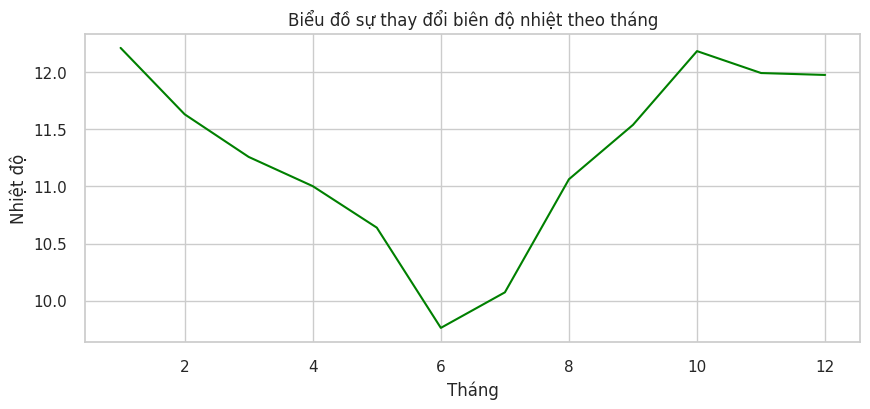

In [ ]:
merged_temp1 = pd.merge(grmonth2, grmonth3, on='Month', how='inner')
merged_temp1['deltaTemp'] = merged_temp1['MaxTemp'] - merged_temp1['MinTemp']

plt.figure(figsize=(10,4))
sns.set(style="whitegrid")
plt.plot(grmonth2['Month'], merged_temp1['deltaTemp'] , color='green')

plt.gca().set(title= 'Biểu đồ sự thay đổi biên độ nhiệt theo tháng', xlabel='Tháng', ylabel='Nhiệt độ')

###Phân tích theo năm

In [ ]:
year2 = time_anal_temp[['MaxTemp', 'Year']]
gryear2 = year2.groupby(['Year']).mean()
gryear2.reset_index(inplace = True)
print('Nhiệt độ cao nhất trong ngày trung bình theo năm')
print(gryear2)

Nhiệt độ cao nhất trong ngày trung bình theo năm
   Year    MaxTemp
0  2008  22.979222
1  2009  23.409452
2  2010  22.757699
3  2011  22.756816
4  2012  22.473077
5  2013  23.317715
6  2014  23.763251
7  2015  23.538718
8  2016  23.516338
9  2017  24.962863


In [ ]:
year3 = time_anal_temp[['MinTemp', 'Year']]
gryear3 = year3.groupby(['Year']).mean()
gryear3.reset_index(inplace = True)
print('Nhiệt độ thấp thấp trong ngày trung bình theo năm')
print(gryear3)

Nhiệt độ thấp thấp trong ngày trung bình theo năm
   Year    MinTemp
0  2008  12.424816
1  2009  12.084558
2  2010  12.016890
3  2011  11.970044
4  2012  11.128538
5  2013  11.765648
6  2014  12.248849
7  2015  12.051172
8  2016  12.345559
9  2017  13.341971


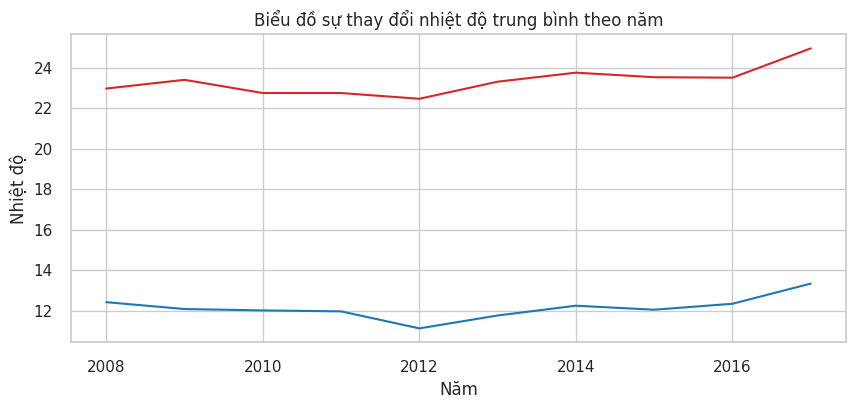

In [ ]:
plt.figure(figsize=(10,4))
sns.set(style="whitegrid")
plt.plot(gryear2['Year'], gryear2['MaxTemp'] , color='tab:red')
plt.plot(gryear3['Year'], gryear3['MinTemp'] , color='tab:blue')
plt.gca().set(title= 'Biểu đồ sự thay đổi nhiệt độ trung bình theo năm', xlabel='Năm', ylabel='Nhiệt độ')
plt.show()